In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [30]:
#lodaing dataset from sklearn  
data = load_breast_cancer() 
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [31]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [32]:
BC= pd.DataFrame(data.data,columns=data.feature_names)
BC['Target'] = data.target 
BC.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [33]:
BC.shape

(569, 31)

In [34]:
BC.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [35]:
x=data.data
y=data.target
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[0:2]

array([[-1.477576  , -0.53865876, -1.38512631, -1.19687908,  0.54211281,
         0.63040422,  2.78260167, -0.1858995 ,  1.09461355,  2.72207905,
        -0.35819555, -0.13548047, -0.55871542, -0.62889529,  0.83183832,
         4.13972837, 13.65265108,  3.87228507,  2.49706926,  2.95661966,
        -1.23951747, -0.55879015, -1.22919008, -0.99035141,  0.58143967,
         1.06038459,  4.82093606,  0.87224493,  2.38202515,  1.76038862],
       [ 1.99169056,  1.55507404,  2.08167245,  1.92613859,  1.06470924,
         3.25534003,  1.98596248,  2.36278319,  2.1418096 ,  1.7140967 ,
         0.84042319, -0.87110839,  0.83722581,  1.06182677, -1.08284419,
         1.53792996,  0.52199414,  0.75694997, -0.28243665,  0.80747944,
         2.08945916,  1.12593145,  1.9893294 ,  2.07377836,  0.62332714,
         2.99809353,  2.02411371,  2.58548659,  2.15166754,  2.33760025]])

In [37]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [38]:
from sklearn.metrics import accuracy_score
predictions = lr.predict(X_test)
accuracy_ = accuracy_score(Y_test, predictions)
print(accuracy_)
# lr.score(X_test,Y_test)

0.9824561403508771


In [39]:
y_predict=lr.predict(X_test)   
y_predict

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
CM=metrics.confusion_matrix(Y_test,y_predict,labels=[0,1])
print(CM)

[[42  1]
 [ 1 70]]


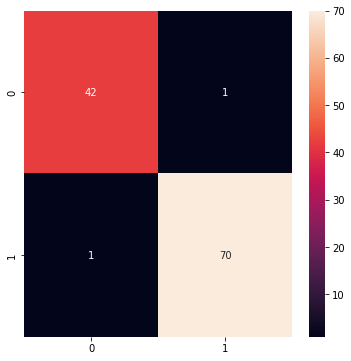

In [41]:
plt.figure(figsize=(6,6))
sns.heatmap(CM,annot=True)

In [42]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [43]:
# Support Vector Machine
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix 

svm = SVC() 
svm.fit(X_train,Y_train) 

SVC()

In [44]:
from sklearn.metrics import accuracy_score
predictions = svm.predict(X_test)
accuracy_ = accuracy_score(Y_test, predictions)
print(accuracy_)

0.9736842105263158


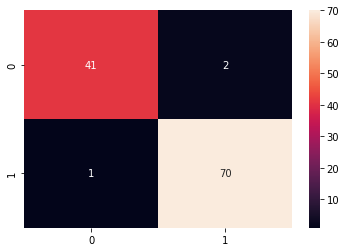

In [45]:
y_predict = svm.predict(X_test)
cm = confusion_matrix(Y_test,y_predict)    
sns.heatmap(cm,annot=True)

In [46]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [47]:
# ROC-AUC : Logistic regression
from sklearn.metrics import auc, roc_curve
decide = lr.decision_function(X_test)
fpr_lr, tpr_lr, thresholds = roc_curve(Y_test, decide, pos_label= 1)
print(f"LogisticRegressionClassifier: {auc(fpr_lr,tpr_lr)}")

LogisticRegressionClassifier: 0.99737962659679


In [48]:
# ROC-AUC : support vector machine
y_score = svm.decision_function(X_test)

fpr_svm, tpr_svm, _ = roc_curve(Y_test, y_score)
print(f"Support Vector Machine: {auc(fpr_svm,tpr_svm)}")


Support Vector Machine: 0.99737962659679


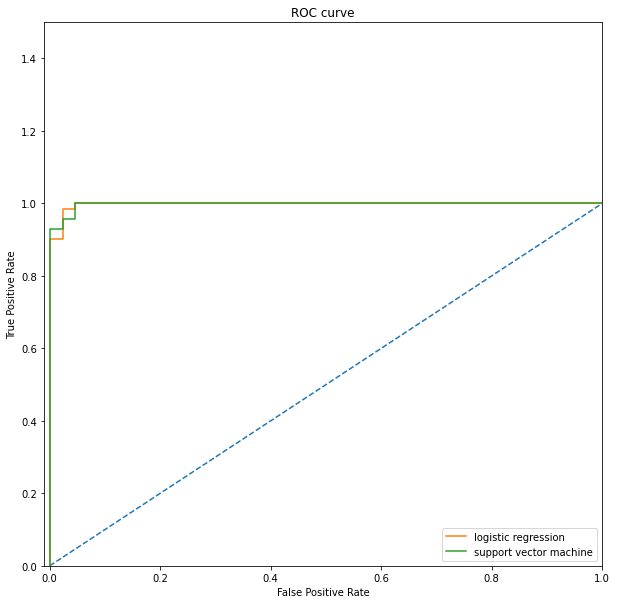

In [49]:
# Plot ROC curve now
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

# Connect diagonals
ax.plot([0, 1], [0, 1], ls="--")

# Labels 
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve')

# scale limit
ax.set_xlim([-0.01, 1.0])
ax.set_ylim([0.0, 1.5])

# Plot logistic regression and support vector machine roc curve
ax.plot(fpr_lr, tpr_lr, label = "logistic regression")
ax.plot(fpr_svm, tpr_svm, label = "support vector machine")
ax.legend(loc="lower right")
plt.show()

# Raw Code - Logistic Regression


In [50]:
import numpy as np 
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt

def standard_scale(X_train):
    for i in range(shape(X_train)[1]):
        X_train[:,i] = (X_train[:,i] - np.mean(X_train[:,i]))/np.std(X_train[:,i])

class LogisticRegression2:
    def formula(self,z):
        formula = 1/(1+exp(-z))
        return formula
    def initialize(self,x):
        weight = np.zeros((shape(x)[1]+1,1))
        x = np.c_[np.ones((shape(x)[0],1)),x]
        return weight,x
    def fit(self,x,y,alpha=0.002,iteration=500):
        weight,x = self.initialize(x)
        def cost(theta):
            res = dot(x,theta)
            cost0 = y.T.dot(log(self.formula(res)))
            cost1 = (1-y).T.dot(log(1-self.formula(res)))
            cost = -((cost1 + cost0))/len(y)
            return cost
        cost_lis = np.zeros(iteration,)
        for i in range(iteration):
            weight = weight - alpha*dot(x.T,self.formula(dot(x,weight))-np.reshape(y,(len(y),1)))
            cost_lis[i] = cost(weight)
        self.weight = weight
        return cost_lis
    def predict(self,x):
        res = dot(self.initialize(x)[1],self.weight)
        class_ = []
        for i in self.formula(res):
            if i>0.5:
                class_.append(1)
            else:
                class_.append(0)
        return class_

def report(y,yhat):
    tp,tn,fp,fn = [0 for i in range(4)]
    for i in range(len(y)):
        if y[i] == 1 and yhat[i] == 1:
            tp += 1
        elif y[i] == 1 and yhat[i] == 0:
            fn += 1
        elif y[i] == 0 and yhat[i] == 1:
            fp += 1
        elif y[i] == 0 and yhat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return print(f"precision : {precision} \nrecall : {recall} \nf1_score : {f1_score} ")

x=data.data
y=data.target
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2, random_state=42)

standard_scale(X_train)
standard_scale(X_test)
lr2 = LogisticRegression2()
model= lr2.fit(X_train,Y_train)
y_predict_test = lr2.predict(X_test)

accuracy2 = accuracy_score(Y_test, y_predict_test)
print(f"accuracy : {accuracy2} \n")

print("Test dataset result")
report(Y_test,y_predict_test)              

accuracy : 0.9824561403508771 

Test dataset result
precision : 0.9726027397260274 
recall : 1.0 
f1_score : 0.9861111111111112 


# Raw Code - Support Vector Machine 

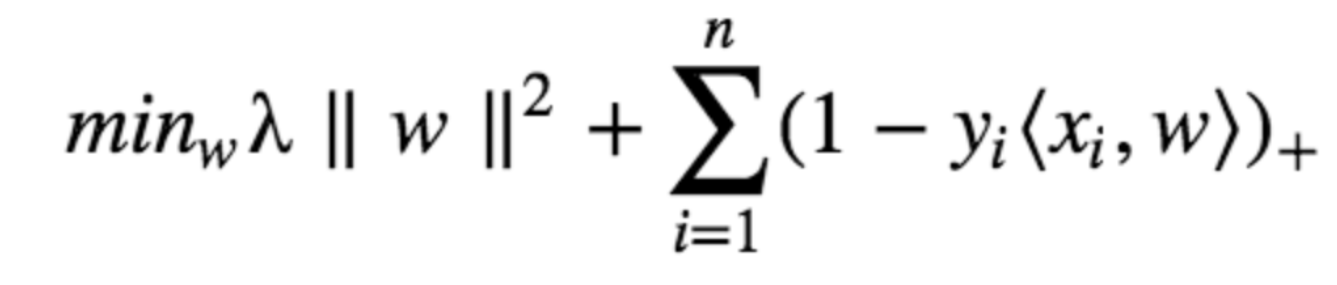

In [52]:
# as there are 30 features
train_features = {}
w = {}
for i in range(X_train.shape[1]):
  train_features[i] = X_train[:,i]
  train_features[i] = train_features[i].reshape(-1,1)
  # weight initialize
  w[i] = np.zeros(train_features[i].shape)

epochs = 1 # initial epoch, inceases toward 500, where epochs * alpha == 1
alpha = 0.002

# epochs < 500
while (epochs * alpha < 1):
  y = w[0] * train_features[0] # initial elementwise multiplication
  for i in range(1, X_train.shape[1]):
    y += w[i] * train_features[i] # elementwise multiplication
  Y_train = Y_train.reshape(-1,1)
  # between two hyper planes, no datapoint should exist
  # X * W + b >= 1 or X * W + b <= -1
  # if a certain class is 1 and the rest are -1, classification result * (y) >= 1
  prod = y * Y_train
  cnt = 0
  for val in prod:
    # No Missclassfication
    if (val >= 1):
      # no need to calculate the deravative of the second term sice it's 0
      cost = 0
      for i in range(30):
        w[i] = w[i] - alpha * (2 * 1/epochs * w[i])
    # Misclassification
    else:
      # since 1 is the margin that could not get smaller, 1-val means the difference between the point and the border
      cost = 1 - val
      for i in range(30):
        w[i] = w[i] + alpha * (train_features[i][cnt] * Y_train[cnt] - 2 * 1/epochs * w[i])

    cnt += 1
  
  print(f"epochs {epochs} finished")
  epochs += 1

epochs 1 finished
epochs 2 finished
epochs 3 finished
epochs 4 finished
epochs 5 finished
epochs 6 finished
epochs 7 finished
epochs 8 finished
epochs 9 finished
epochs 10 finished
epochs 11 finished
epochs 12 finished
epochs 13 finished
epochs 14 finished
epochs 15 finished
epochs 16 finished
epochs 17 finished
epochs 18 finished
epochs 19 finished
epochs 20 finished
epochs 21 finished
epochs 22 finished
epochs 23 finished
epochs 24 finished
epochs 25 finished
epochs 26 finished
epochs 27 finished
epochs 28 finished
epochs 29 finished
epochs 30 finished
epochs 31 finished
epochs 32 finished
epochs 33 finished
epochs 34 finished
epochs 35 finished
epochs 36 finished
epochs 37 finished
epochs 38 finished
epochs 39 finished
epochs 40 finished
epochs 41 finished
epochs 42 finished
epochs 43 finished
epochs 44 finished
epochs 45 finished
epochs 46 finished
epochs 47 finished
epochs 48 finished
epochs 49 finished
epochs 50 finished
epochs 51 finished
epochs 52 finished
epochs 53 finished
ep

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# test the accuracy
test_features = {}
for i in range(X_test.shape[1]):
  test_features[i] = X_test[:,i]
  test_features[i] = test_features[i].reshape(-1,1)

# clip the weights
del_idx = [i for i in range(114, 455)]
for i in range(X_test.shape[1]):
  w[i] = np.delete(w[i], del_idx)
  w[i] = w[i].reshape(-1, 1)

y_pred = w[0] * test_features[0]
for i in range(1, X_test.shape[1]):
  y_pred += w[i] * test_features[i]

preds = []
for val in y_pred:
  if val > 1:
    preds.append(1)
  else:
    preds.append(0)

print(accuracy_score(Y_test, preds))
conf_mat = pd.DataFrame(confusion_matrix(Y_test, preds))
display(conf_mat)

print("Test dataset result")
report(Y_test, preds)      

0.956140350877193


,0,1
0,42,1
1,4,67


Test dataset result
precision : 0.9852941176470589 
recall : 0.9436619718309859 
f1_score : 0.9640287769784172 
